In [56]:
import os
import glob
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import csv 
import pandas as pd
import numpy as np
%matplotlib inline
from pandas import DataFrame, read_csv
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import scipy.special as sse
from scipy.stats import chisquare


In [57]:
cd C:\Users\mcdonaldad\Desktop\Output\gamma

C:\Users\mcdonaldad\Desktop\Output\gamma


In [73]:
#Import all files 
Folders = os.listdir()
Files = dict()
areas=dict()
for x in range(0,len(Folders)):
    Files[x] = glob.glob(Folders[x]+"\*.csv")
    df = pd.concat((pd.read_csv(f,header=None) for f in Files[x]), axis=1)
    rows = len(df[0])
    columns = len(Files[x])
    new_length = rows*columns
    areas[x] = df.values.reshape(new_length,1)

In [89]:
#bin the areas
nbins= 600
hist= dict()
bin_edges = dict()
bin_centres = dict()
for x in range(0,len(Folders)): 
    hist[x], bin_edges[x] = np.histogram(areas[x] , nbins)
    bin_centres[x] = (bin_edges[x][:-1] + bin_edges[x][1:])/2


In [90]:
#Background Subtraction
#All Traces

LLS = dict()
w = dict()
bg = dict()
nobg = dict()
for x in range(0,len(Folders)):
    LLS[x] = (np.log(np.log(np.sqrt(hist[x]+1)+1)+1))   #LLS operator

    m=15   #no. of iterations
    w[x] = np.zeros(len(LLS[x]))

    for p in range(1,m):           #SNIP Algorithm
        for i in range(1,len(LLS[x])-p):
            a1 = LLS[x][i]
            a2 = (LLS[x][i-p]+LLS[x][i+p])/2
            w[x][i] = min(a1,a2)
        LLS[x] = w[x]

    bg[x] = ((np.exp(np.exp(w[x])-1)-1)**2)-1    #Inverse LLS 

    nobg[x] = hist[x] - bg[x]

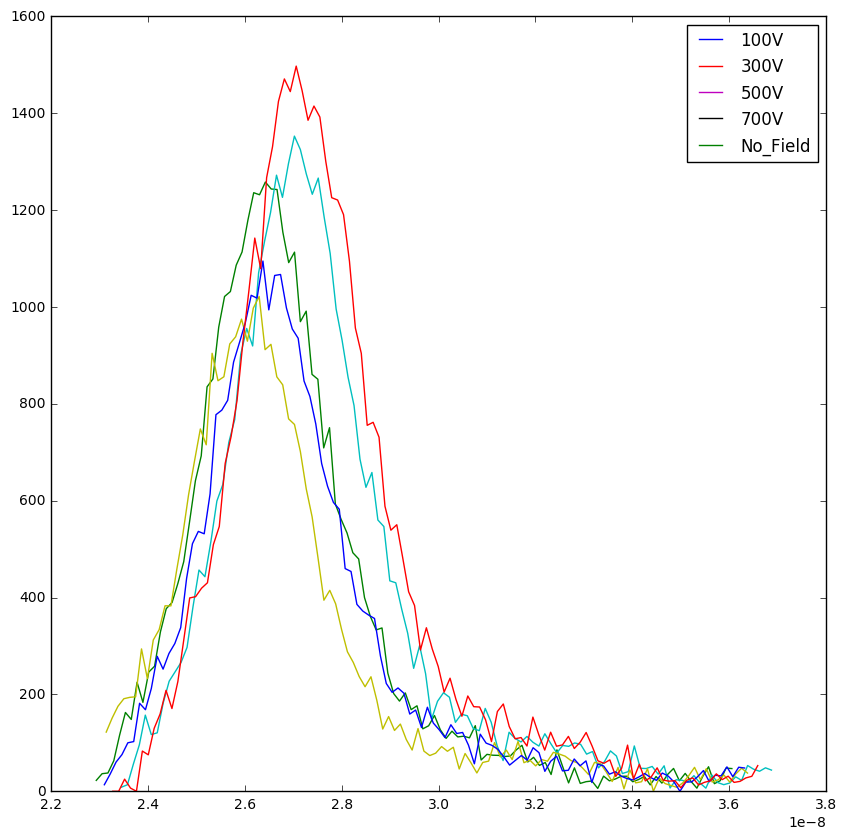

In [92]:
#Fit to normal gaussian
x2= dict()
y2= dict() 
binc= dict() 
hist2= dict()
mean= dict() 
SD= dict()
p0= dict()
coeff= dict()
var_matrix= dict() 
vars= dict()
dof= dict()
hist_fit = dict()

plt.figure(figsize=[10,10])

def gauss(x, *p):                                               #defines gaussian fit
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

for x in range(0,len(Folders)):
    xcut     = 190
    ycut     = 300
    binc[x]  = bin_centres[x][xcut:ycut]
    hist2[x] = nobg[x][xcut:ycut]

    x2[x]    = binc[x]
    y2[x]    = hist2[x]
                                            #prediction of mean from array
    mean[x]  = float(sum(areas[x]))/len(areas[x]) if len(areas[x]) > 0 else float('nan')  
    SD[x]    = np.std(areas[x])



    p0[x]                    = [1., mean[x], SD[x]]                                   #estimation of parameters
    coeff[x], var_matrix[x]  = curve_fit(gauss, x2[x], y2[x], p0=p0[x])   #fits the gauss function to the data

    dof[x] = len(y2[x])-len(coeff[x])

    for u in range(0,len(x2[x])-1):
        fitarray = []
        fitarray.append(((x2[x][u+1]-x2[x][u])/2)+x2[x][u])

    vars=np.linspace(fitarray[0],fitarray[-1],1000)              #draws the fit
    hist_fit[x] = gauss(vars, *coeff[x])
    plt.plot(vars, hist_fit[x], label=Folders[x])
    #plt.xlim(-0.8e-9,-0.3e-9)
    fitarray = None
    plt.legend()
    plt.plot(binc[x],hist2[x])

plt.show()

In [42]:
for u in range(0,len(x2[0])-1):
    fitarray[x] = (((x2[0][u+1]-x2[0][u])/2)+x2[0][u])


{0: 7.2141134720000101e-08}


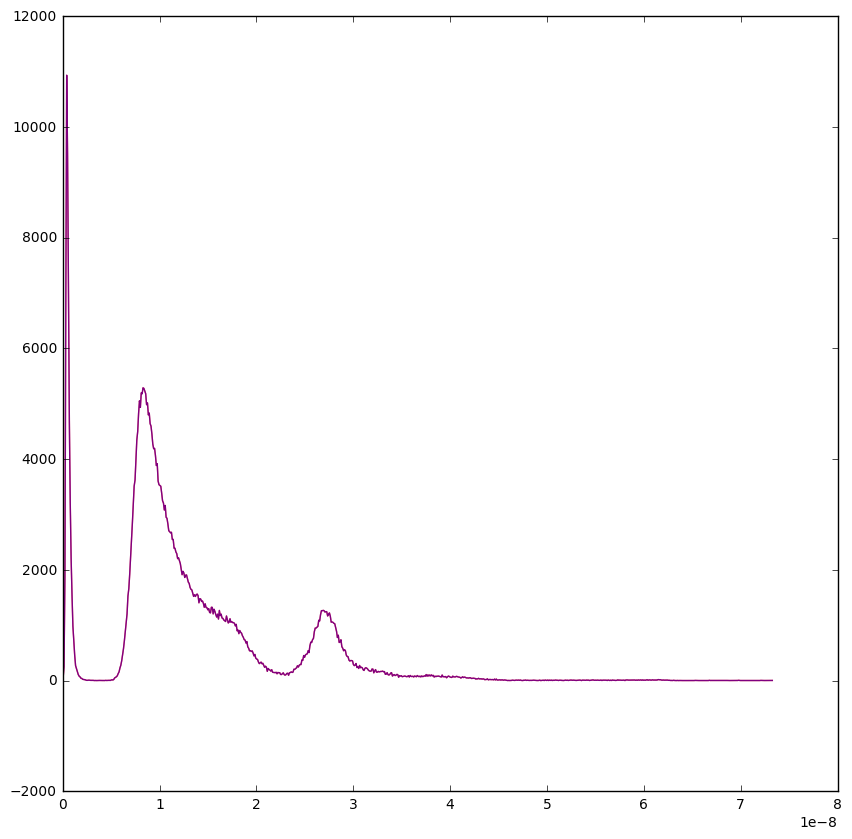

In [28]:
allFiles0_1 = glob.glob("*.csv")
df0_1 = pd.concat((pd.read_csv(f,header=None) for f in allFiles0_1), axis=1)
rows = len(df0_1[0])
columns = len(allFiles0_1)
new_length = rows*columns
areas0_1 = df0_1.values.reshape(new_length,1)
hist0_1, bin_edges0_1 = np.histogram(areas0_1 , nbins)
bin_centres0_1 = (bin_edges0_1[:-1] + bin_edges0_1[1:])/2

#Background Subtraction

LLS = []
LLS.append(np.log(np.log(np.sqrt(hist0_1+1)+1)+1))   #LLS operator

m=25   #no. of iterations
w = np.zeros(len(LLS[0]))

for p in range(1,m):           #SNIP Algorithm
    for i in range(1,len(LLS[0])-p):
        a1 = LLS[0][i]
        a2 = (LLS[0][i-p]+LLS[0][i+p])/2
        w[i] = min(a1,a2)
    LLS[0] = w

bg0_1 = ((np.exp(np.exp(w)-1)-1)**2)-1    #Inverse LLS 

nobg0_1 = hist0_1 - bg0_1

#Fit to normal gaussian

xcut = 0
ycut = 2000
binc0_1 = bin_centres0_1[xcut:ycut]
hist20_1 = nobg0_1[xcut:ycut]

x0_1 = binc0_1
y0_1 = hist20_1
plt.figure(figsize=(10,10))
plt.plot(x0_1,y0_1 , color = 'r')
plt.plot(x0_1,y0_1, alpha = 0.5)

(0, 5e-08)

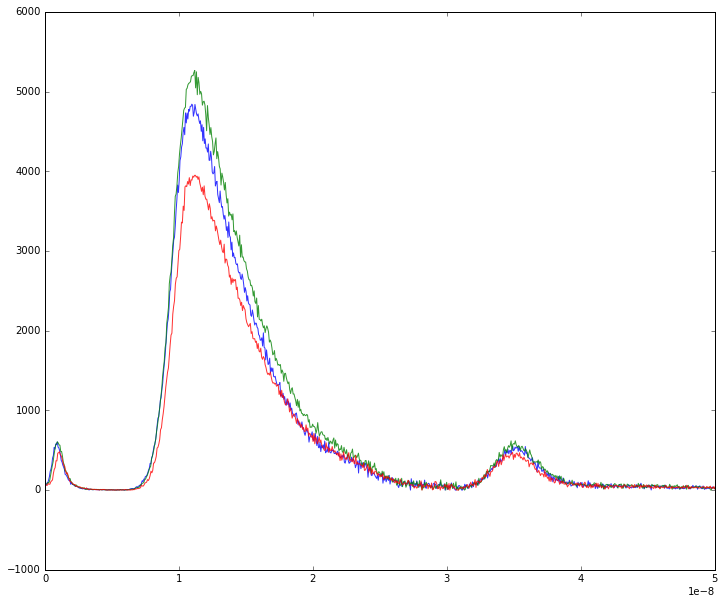

In [34]:
allFiles05 = glob.glob("*.csv")
df05 = pd.concat((pd.read_csv(f,header=None) for f in allFiles05), axis=1)
rows = len(df05[0])
columns = len(allFiles05)
new_length = rows*columns
areas05 = df05.values.reshape(new_length,1)
hist05, bin_edges05 = np.histogram(areas05 , nbins)
bin_centres05 = (bin_edges05[:-1] + bin_edges05[1:])/2

#Background Subtraction

LLS = []
LLS.append(np.log(np.log(np.sqrt(hist05+1)+1)+1))   #LLS operator

m=25   #no. of iterations
w = np.zeros(len(LLS[0]))

for p in range(1,m):           #SNIP Algorithm
    for i in range(1,len(LLS[0])-p):
        a1 = LLS[0][i]
        a2 = (LLS[0][i-p]+LLS[0][i+p])/2
        w[i] = min(a1,a2)
    LLS[0] = w

bg05 = ((np.exp(np.exp(w)-1)-1)**2)-1    #Inverse LLS 

nobg05 = hist05 - bg05

#Fit to normal gaussian

xcut = 0
ycut = 2000
binc05 = bin_centres05[xcut:ycut]
hist205 = nobg05[xcut:ycut]

x05 = binc05
y05 = hist205
plt.figure(figsize=(12,10))
plt.plot(x01,y01, alpha = 0.8)
plt.plot(x0,y0, alpha = 0.8)
plt.plot(x05,y05, alpha = 0.8)
plt.xlim(0,5e-8)

In [44]:
allFiles1 = glob.glob("*.csv")
df1 = pd.concat((pd.read_csv(f,header=None) for f in allFiles1), axis=1)
rows = len(df1[0])
columns = len(allFiles1)
new_length = rows*columns
areas1 = df1.values.reshape(new_length,1)
hist1, bin_edges1 = np.histogram(areas1 , nbins)
bin_centres1 = (bin_edges1[:-1] + bin_edges1[1:])/2

#Background Subtraction

LLS = []
LLS.append(np.log(np.log(np.sqrt(hist1+1)+1)+1))   #LLS operator

m=25   #no. of iterations
w = np.zeros(len(LLS[0]))

for p in range(1,m):           #SNIP Algorithm
    for i in range(1,len(LLS[0])-p):
        a1 = LLS[0][i]
        a2 = (LLS[0][i-p]+LLS[0][i+p])/2
        w[i] = min(a1,a2)
    LLS[0] = w

bg1 = ((np.exp(np.exp(w)-1)-1)**2)-1    #Inverse LLS 

nobg1 = hist1 - bg1

#Fit to normal gaussian

xcut = 0
ycut = 2000
binc1 = bin_centres1[xcut:ycut]
hist21 = nobg1[xcut:ycut]

x1 = binc1
y1 = hist21

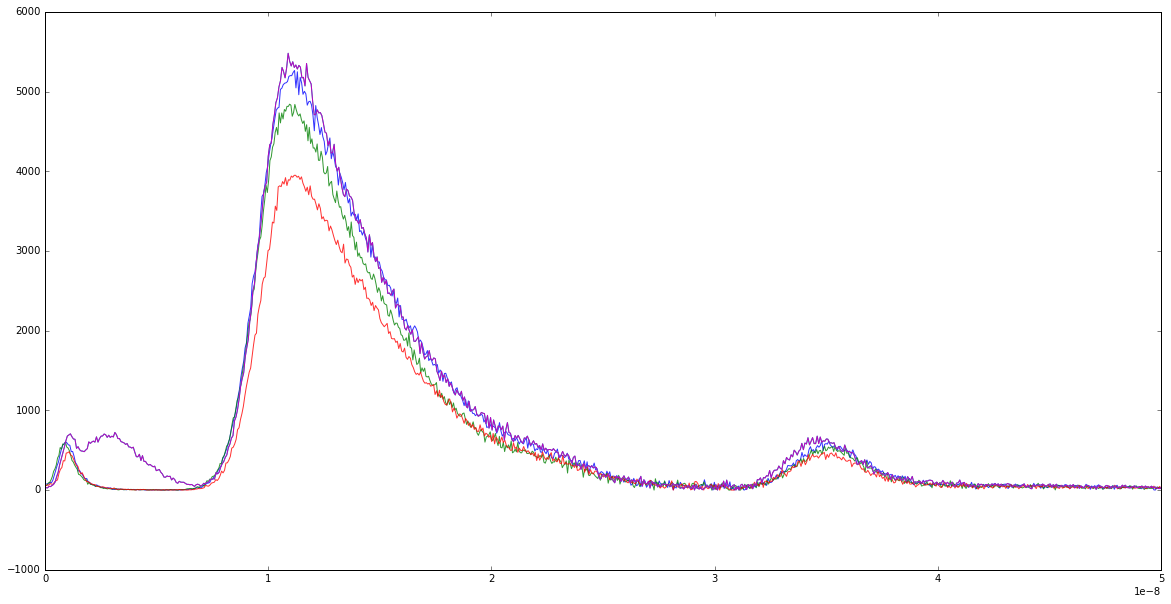

In [51]:
allFiles3 = glob.glob("*.csv")
df3 = pd.concat((pd.read_csv(f,header=None) for f in allFiles3), axis=1)
rows = len(df3[0])
columns = len(allFiles3)
new_length = rows*columns
areas3 = df3.values.reshape(new_length,1)
hist3, bin_edges3 = np.histogram(areas3 , nbins)
bin_centres3 = (bin_edges3[:-1] + bin_edges3[1:])/2

#Background Subtraction

LLS = []
LLS.append(np.log(np.log(np.sqrt(hist3+1)+1)+1))   #LLS operator

m=25   #no. of iterations
w = np.zeros(len(LLS[0]))

for p in range(1,m):           #SNIP Algorithm
    for i in range(1,len(LLS[0])-p):
        a1 = LLS[0][i]
        a2 = (LLS[0][i-p]+LLS[0][i+p])/2
        w[i] = min(a1,a2)
    LLS[0] = w

bg3 = ((np.exp(np.exp(w)-1)-1)**2)-1    #Inverse LLS 

nobg3 = hist3 - bg3

#Fit to normal gaussian

xcut = 0
ycut = 2000
binc3 = bin_centres3[xcut:ycut]
hist23 = nobg3[xcut:ycut]

x3 = binc3
y3 = hist23
plt.figure(figsize=(20,10))
plt.plot(x0,y0, alpha = 0.8)
plt.plot(x0_1,y0_1, alpha = 0.8)
plt.plot(x05,y05, alpha = 0.8)
plt.plot(x1,y1)
plt.plot(x3,y3)
plt.xlim(0,5e-8)
plt.show()



In [49]:
def gauss(x, *p):                                               #defines gaussian fit
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

                                                                #prediction of mean from array
mean0=float(sum(areas0))/len(areas0) if len(areas0) > 0 else float('nan')  
SD0=np.std(areas0)

p00 = [1., mean0, SD0]                                             #estimation of parameters
coeff0, var_matrix0 = curve_fit(gauss, x0, y0, p0=p00)

mean01=float(sum(areas0_1))/len(areas0_1) if len(areas0_1) > 0 else float('nan')  
SD01=np.std(areas0_1)

p01 = [1., mean01, SD01]                                             #estimation of parameters
coeff01, var_matrix01 = curve_fit(gauss, x0_1, y0_1, p0=p00)

mean05=float(sum(areas05))/len(areas05) if len(areas05) > 0 else float('nan')  
SD05=np.std(areas05)

p05 = [1., mean05, SD05]                                             #estimation of parameters
coeff05, var_matrix05 = curve_fit(gauss, x05, y05, p0=p05)

mean1=float(sum(areas1))/len(areas1) if len(areas1) > 0 else float('nan')  
SD1=np.std(areas1)

p01 = [1., mean1, SD1]                                             #estimation of parameters
coeff1, var_matrix1 = curve_fit(gauss, x1, y1, p0=p01)

mean3=float(sum(areas3))/len(areas3) if len(areas3) > 0 else float('nan')  
SD3=np.std(areas3)

p03 = [1., mean3, SD3]                                             #estimation of parameters
coeff3, var_matrix3 = curve_fit(gauss, x3, y3, p0=p03)

In [2]:
bw0 = 6.3325e-11
bw01 = 5.873727e-11
bw05 = 6.5062e-11
bw1 = 6.87e-11
bw2 = 6.4467459999999979e-11
bw3 = 6.87e-11
fwhm0 = 3.8307294464467327e-09
fwhm01 = 3.8363918519946431e-09
fwhm05 = 3.7738155351845032e-09
fwhm1 = 3.9495392226275796e-09
fwhm2 = 3.9477994496741262e-09
fwhm3 = 3.8212e-09
mean0 = 3.52166450514e-08
mean01 = 3.515853659e-08
mean05 = 3.52058004668837e-08
mean1 = 3.5106758e-08
mean2 = 3.5282637440217951e-08
mean3 = 3.4903191539e-08

In [3]:
dr0 = ((np.sqrt(((bw0/fwhm0)**2)+(bw0/(2*mean0))**2))*(fwhm0/mean0))*100
dr01 = ((np.sqrt(((bw01/fwhm01)**2)+(bw01/(2*mean01))**2))*(fwhm01/mean01))*100
dr05 = ((np.sqrt(((bw05/fwhm05)**2)+(bw05/(2*mean05))**2))*(fwhm05/mean05))*100
dr1 = ((np.sqrt(((bw1/fwhm1)**2)+(bw1/(2*mean1))**2))*(fwhm1/mean1))*100
dr2 = ((np.sqrt(((bw2/fwhm2)**2)+(bw2/(2*mean2))**2))*(fwhm2/mean2))*100
dr3 = ((np.sqrt(((bw3/fwhm3)**2)+(bw3/(2*mean3))**2))*(fwhm3/mean3))*100

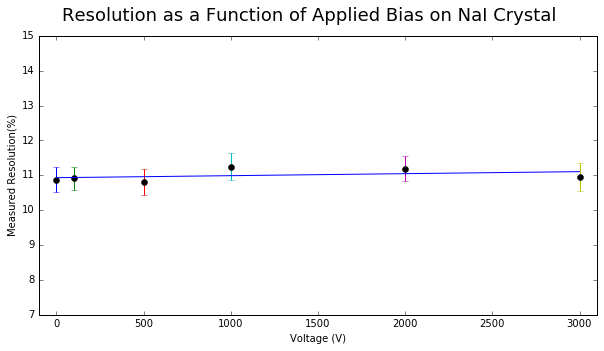

poly1d([  5.77142857e-05,   1.09315143e+01])

In [5]:
ER = [10.87,10.91,10.80,11.25, 11.19, 10.95]
Voltage = [0,100,500,1000,2000,3000]

plt.figure(figsize=[10,5])
plt.errorbar(Voltage[0],ER[0],xerr=0,yerr=2*dr0)
plt.errorbar(Voltage[1],ER[1],xerr=0,yerr=2*dr01)
plt.errorbar(Voltage[2],ER[2],xerr=0,yerr=2*dr05)
plt.errorbar(Voltage[3],ER[3],xerr=0,yerr=2*dr1)
plt.errorbar(Voltage[4],ER[4],xerr=0,yerr=2*dr2)
plt.errorbar(Voltage[5],ER[5],xerr=0,yerr=2*dr3)
z = np.polyfit(Voltage, ER, 1)
f = np.poly1d(z)
# calculate new x's and y's
x_new = np.linspace(Voltage[0], Voltage[-1], 50)
y_new = f(x_new)
plt.plot(Voltage,ER,'o', x_new, y_new)
plt.ylim(7,15)
plt.xlim(-100,3100)
plt.xlabel('Voltage (V)')
plt.ylabel('Measured Resolution(%)')
plt.suptitle('Resolution as a Function of Applied Bias on NaI Crystal',fontsize=18)
plt.savefig('Resolution vs Voltage.pdf')
plt.show()

f

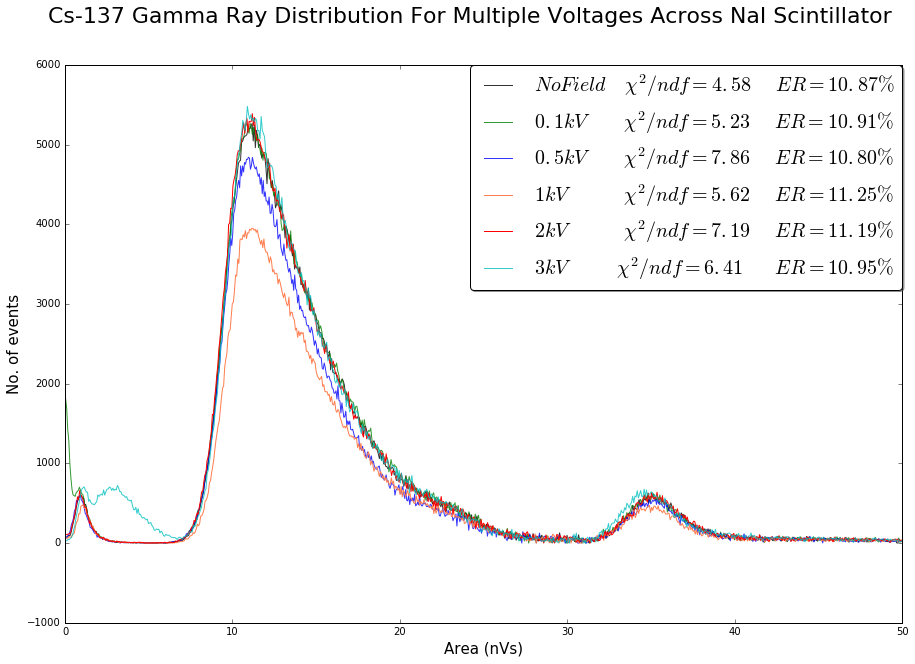

In [115]:
plt.figure(figsize=(15,10))
plt.plot((x0*1e9),y0, alpha = 0.8, color='k',label=r'$No Field$ 'r'  $\chi^2/ndf = 4.58$' r'    $ER=10.87\%$')
plt.plot((x01*1e9),y01, alpha = 0.8,color='g',label=r'$0.1 kV$'r'      $\chi^2/ndf = 5.23$' r'    $ER=10.91\%$')
plt.plot((x05*1e9),y05, alpha = 0.8,color='b',label=r'$0.5 kV$' r'      $\chi^2/ndf = 7.86$' r'    $ER=10.80\%$')
plt.plot((x1*1e9),y1,color='coral',label=r'$1 kV$' r'         $\chi^2/ndf = 5.62$' r'    $ER=11.25\%$')
plt.plot((x2*1e9),y2,color='r', label=r'$2 kV$' r'         $\chi^2/ndf = 7.19$' r'    $ER=11.19\%$')
plt.plot((x3*1e9),y3, alpha = 0.8,color='c',label=r'$3 kV$' r'        $\chi^2/ndf = 6.41$' r'     $ER=10.95\%$')
plt.xlabel('Area (nVs)',fontsize=15)
plt.ylabel('No. of events',fontsize=15)
plt.suptitle('Cs-137 Gamma Ray Distribution For Multiple Voltages Across NaI Scintillator',fontsize=22)
plt.legend(bbox_to_anchor=(1,1),loc=1,borderaxespad=0,fontsize=20,shadow=True,fancybox=True)
plt.xlim(0,50)
plt.savefig('All Voltages.pdf')

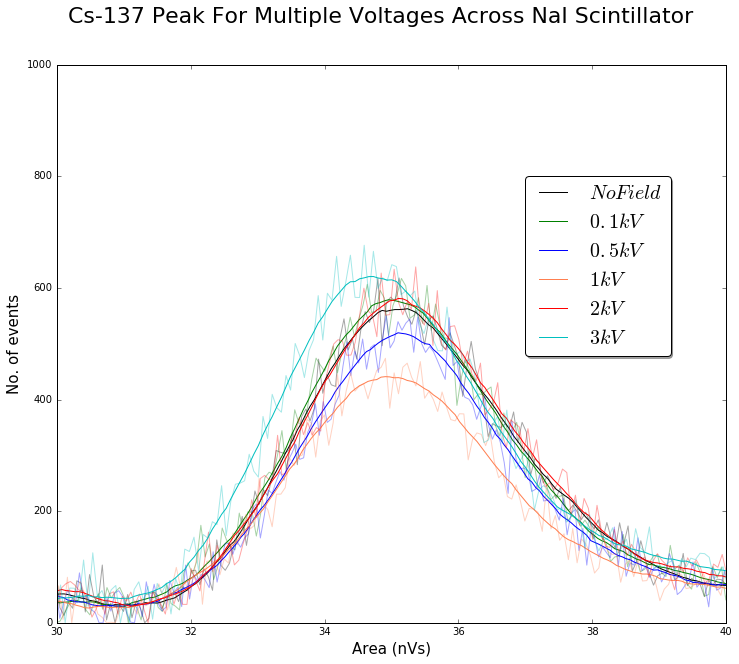

In [116]:
from scipy.signal import savgol_filter

smpt = 41
smooth0 = savgol_filter(y0,smpt,3)
smooth01 = savgol_filter(y01,smpt,3)
smooth05 = savgol_filter(y05,smpt,3)
smooth1 = savgol_filter(y1,smpt,3)
smooth2 = savgol_filter(y2,smpt,3)
smooth3 = savgol_filter(y3,smpt,3)
plt.figure(figsize=(12,10))
plt.plot((x0*1e9), y0, alpha = 0.35, color='k')
plt.plot((x0*1e9), smooth0, label=r'$No Field$',color='k')
plt.plot((x01*1e9), y01, alpha = 0.35, color='g')
plt.plot((x01*1e9), smooth01, label=r'$0.1 kV$',color ='g')
plt.plot((x05*1e9), y05, alpha = 0.35, color='b')
plt.plot((x05*1e9), smooth05, label=r'$0.5 kV$',color='b')
plt.plot((x1*1e9), y1, alpha = 0.35, color='coral')
plt.plot((x1*1e9), smooth1, label=r'$1 kV$',color ='coral')
plt.plot((x2*1e9), y2, alpha =0.35, color ='r')
plt.plot((x2*1e9), smooth2, label=r'$2 kV$',color='r')
plt.plot((x3*1e9),y3, alpha = 0.35, color='c')
plt.plot((x3*1e9), smooth3, label=r'$3 kV$',color='c')
plt.xlabel('Area (nVs)',fontsize=15)
plt.ylabel('No. of events',fontsize=15)
plt.suptitle('Cs-137 Peak For Multiple Voltages Across NaI Scintillator',fontsize=22)
plt.legend(bbox_to_anchor=(0.7,0.8),loc=2,borderaxespad=0,fontsize=20,shadow=True,fancybox=True)
plt.xlim(30,40)
plt.ylim(0,1000)
plt.savefig('peak zoom.pdf')